<a href="https://colab.research.google.com/github/TejaswiniVB/YOLOV8-custom/blob/main/YOLOv8_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 6.8 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="72UCyIAyyGVz1wUHWgGw")
project = rf.workspace("personalshapes").project("shapes-lkhtg")
dataset = project.version(4).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Shapes-4 in yolov8:: 100%|██████████| 1250/1250 [00:00<00:00, 9894.60it/s]


In [3]:
dataset

In [4]:
dataset.location

'/content/Shapes-4'

In [7]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 196MB/s]
Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Shapes-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=T

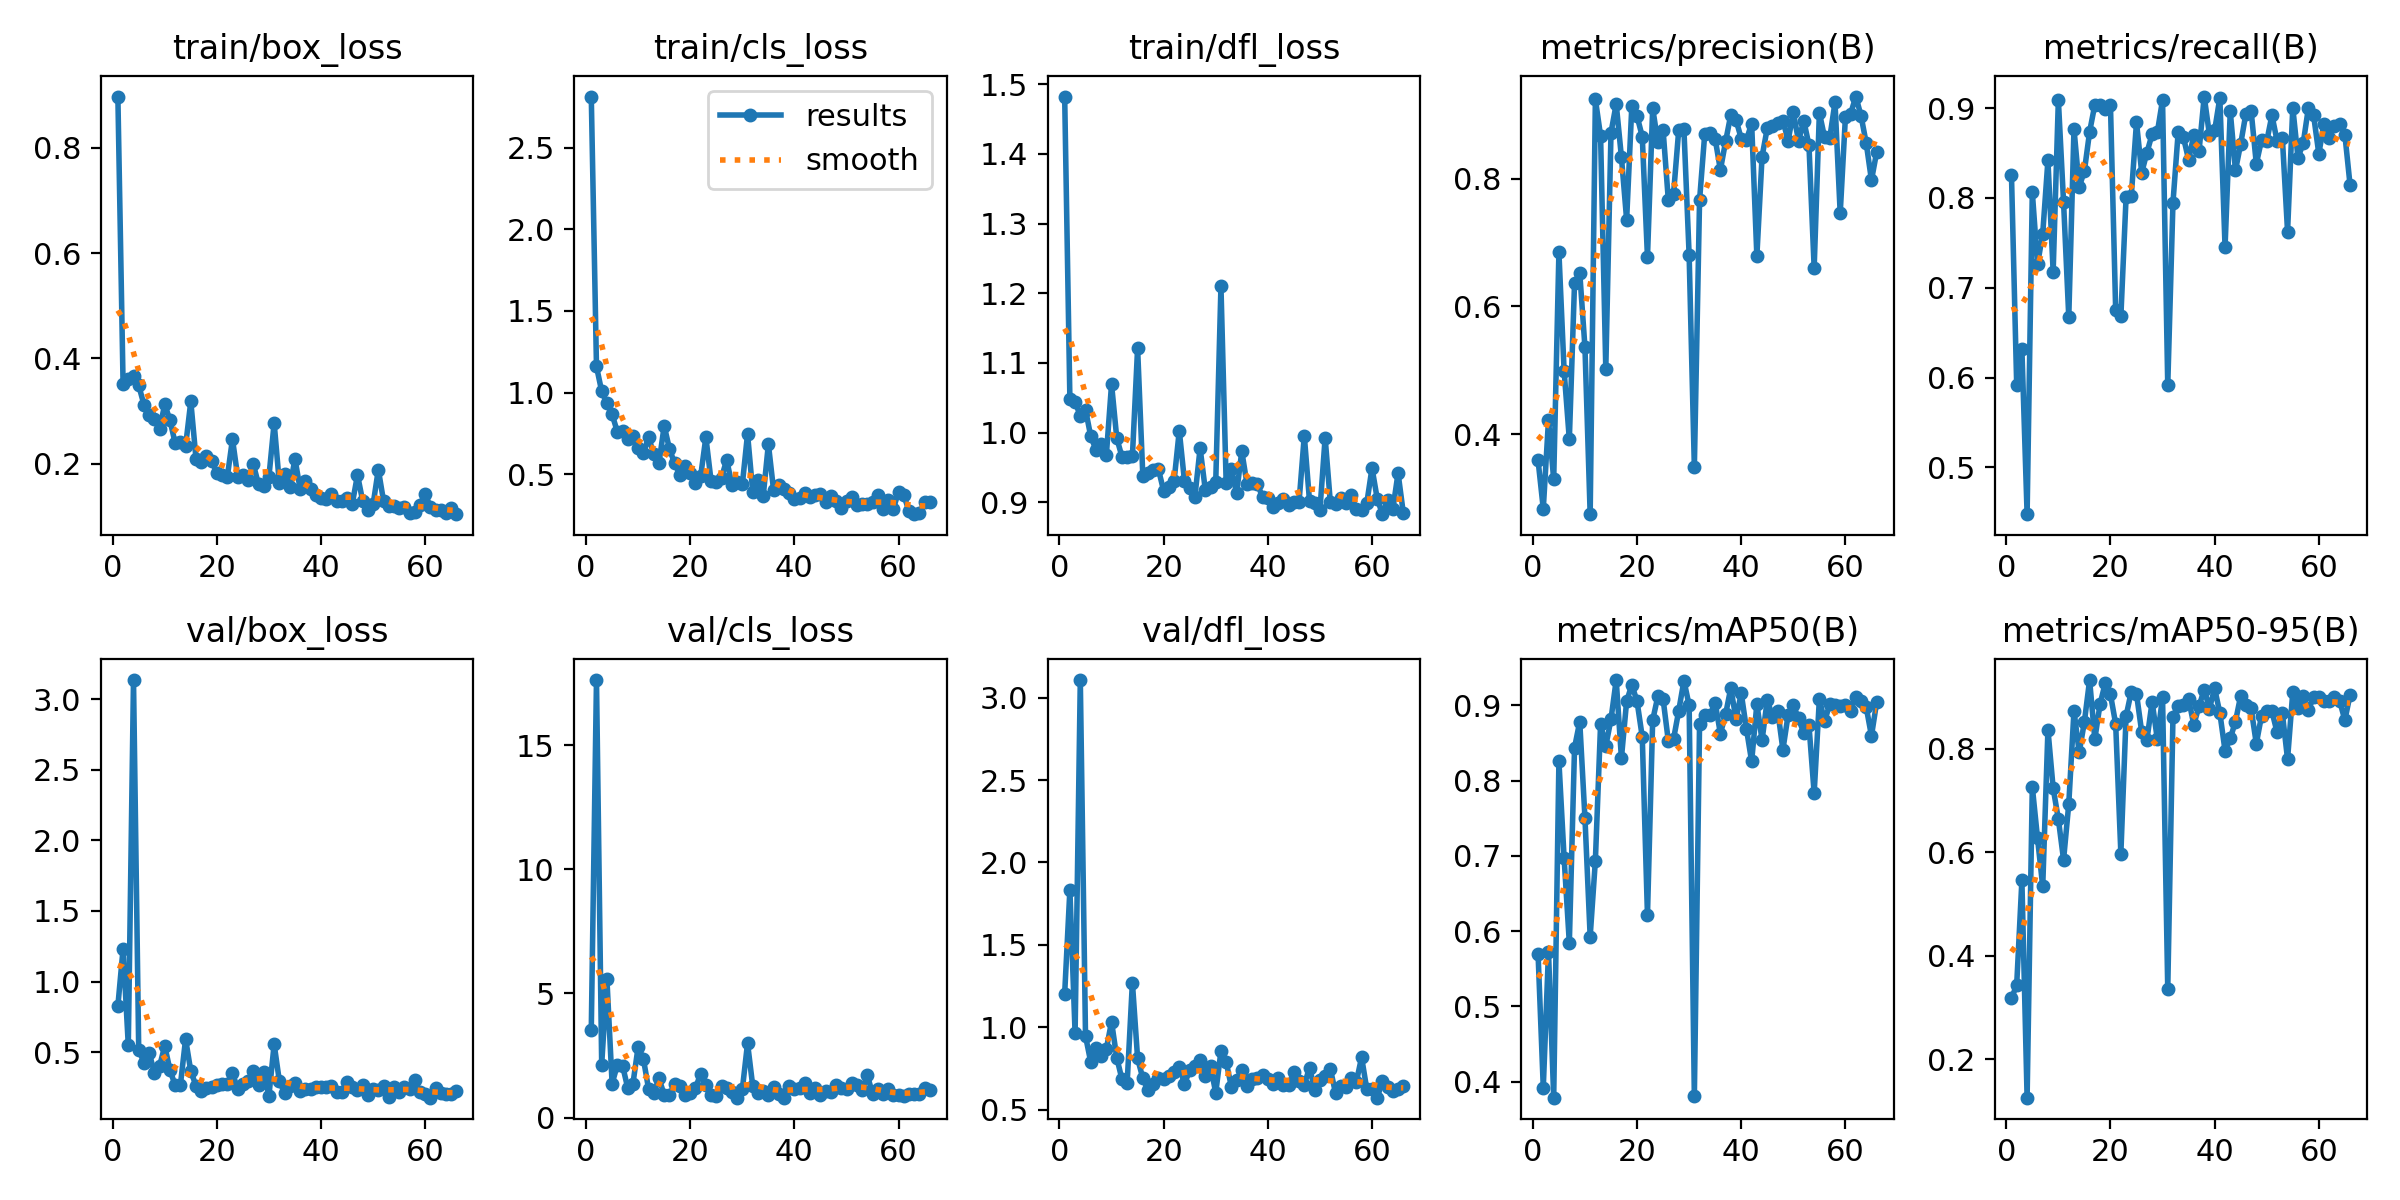

In [10]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/results.png', height=800)

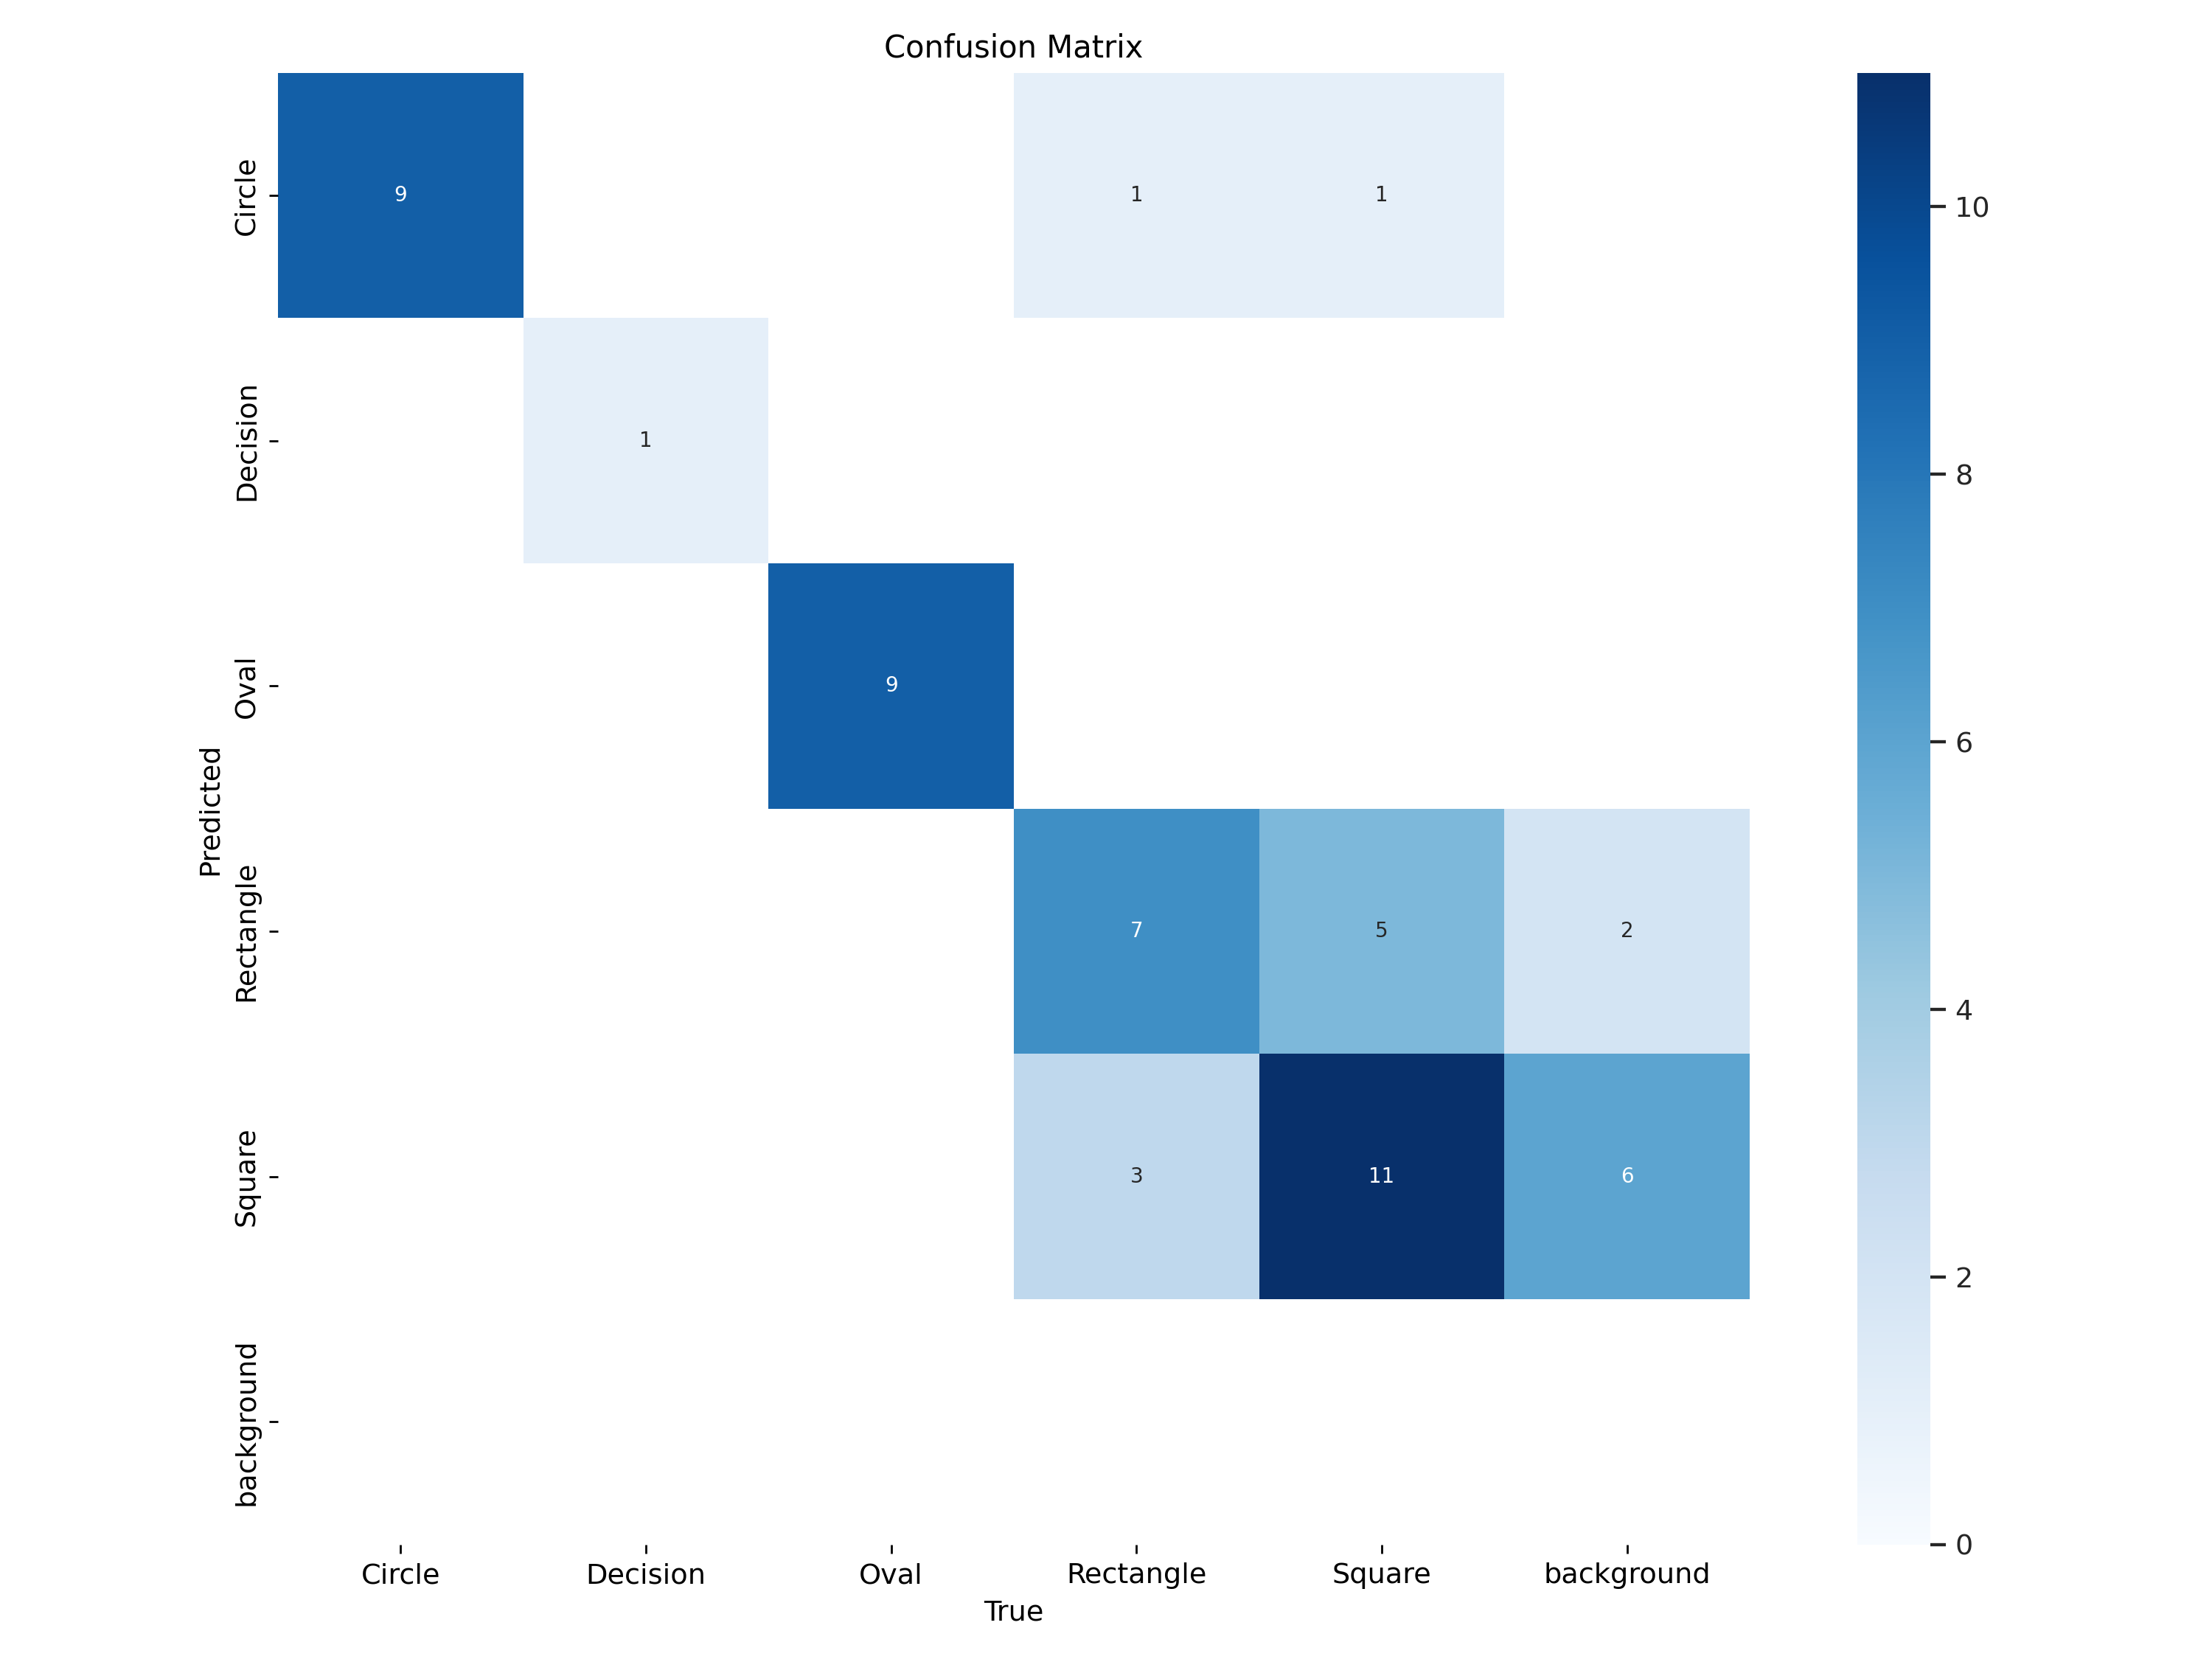

In [11]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [14]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Shapes-4/Shapes-4/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.55it/s]
                   all         47         47      0.917      0.874      0.934      0.933
                Circle         47          9          1      0.887      0.995      0.995
              Decision         47          1      0.937          1      0.995      0.995
                  Oval         47          9       0.97          1      0.995      0.995
             Rectangle         47         11      0.851      0.636      0.758      0.751
                Square         47         17      0.827      0.847      0.927      0.927
Speed: 3.7ms preprocess, 21.9ms inference, 0.

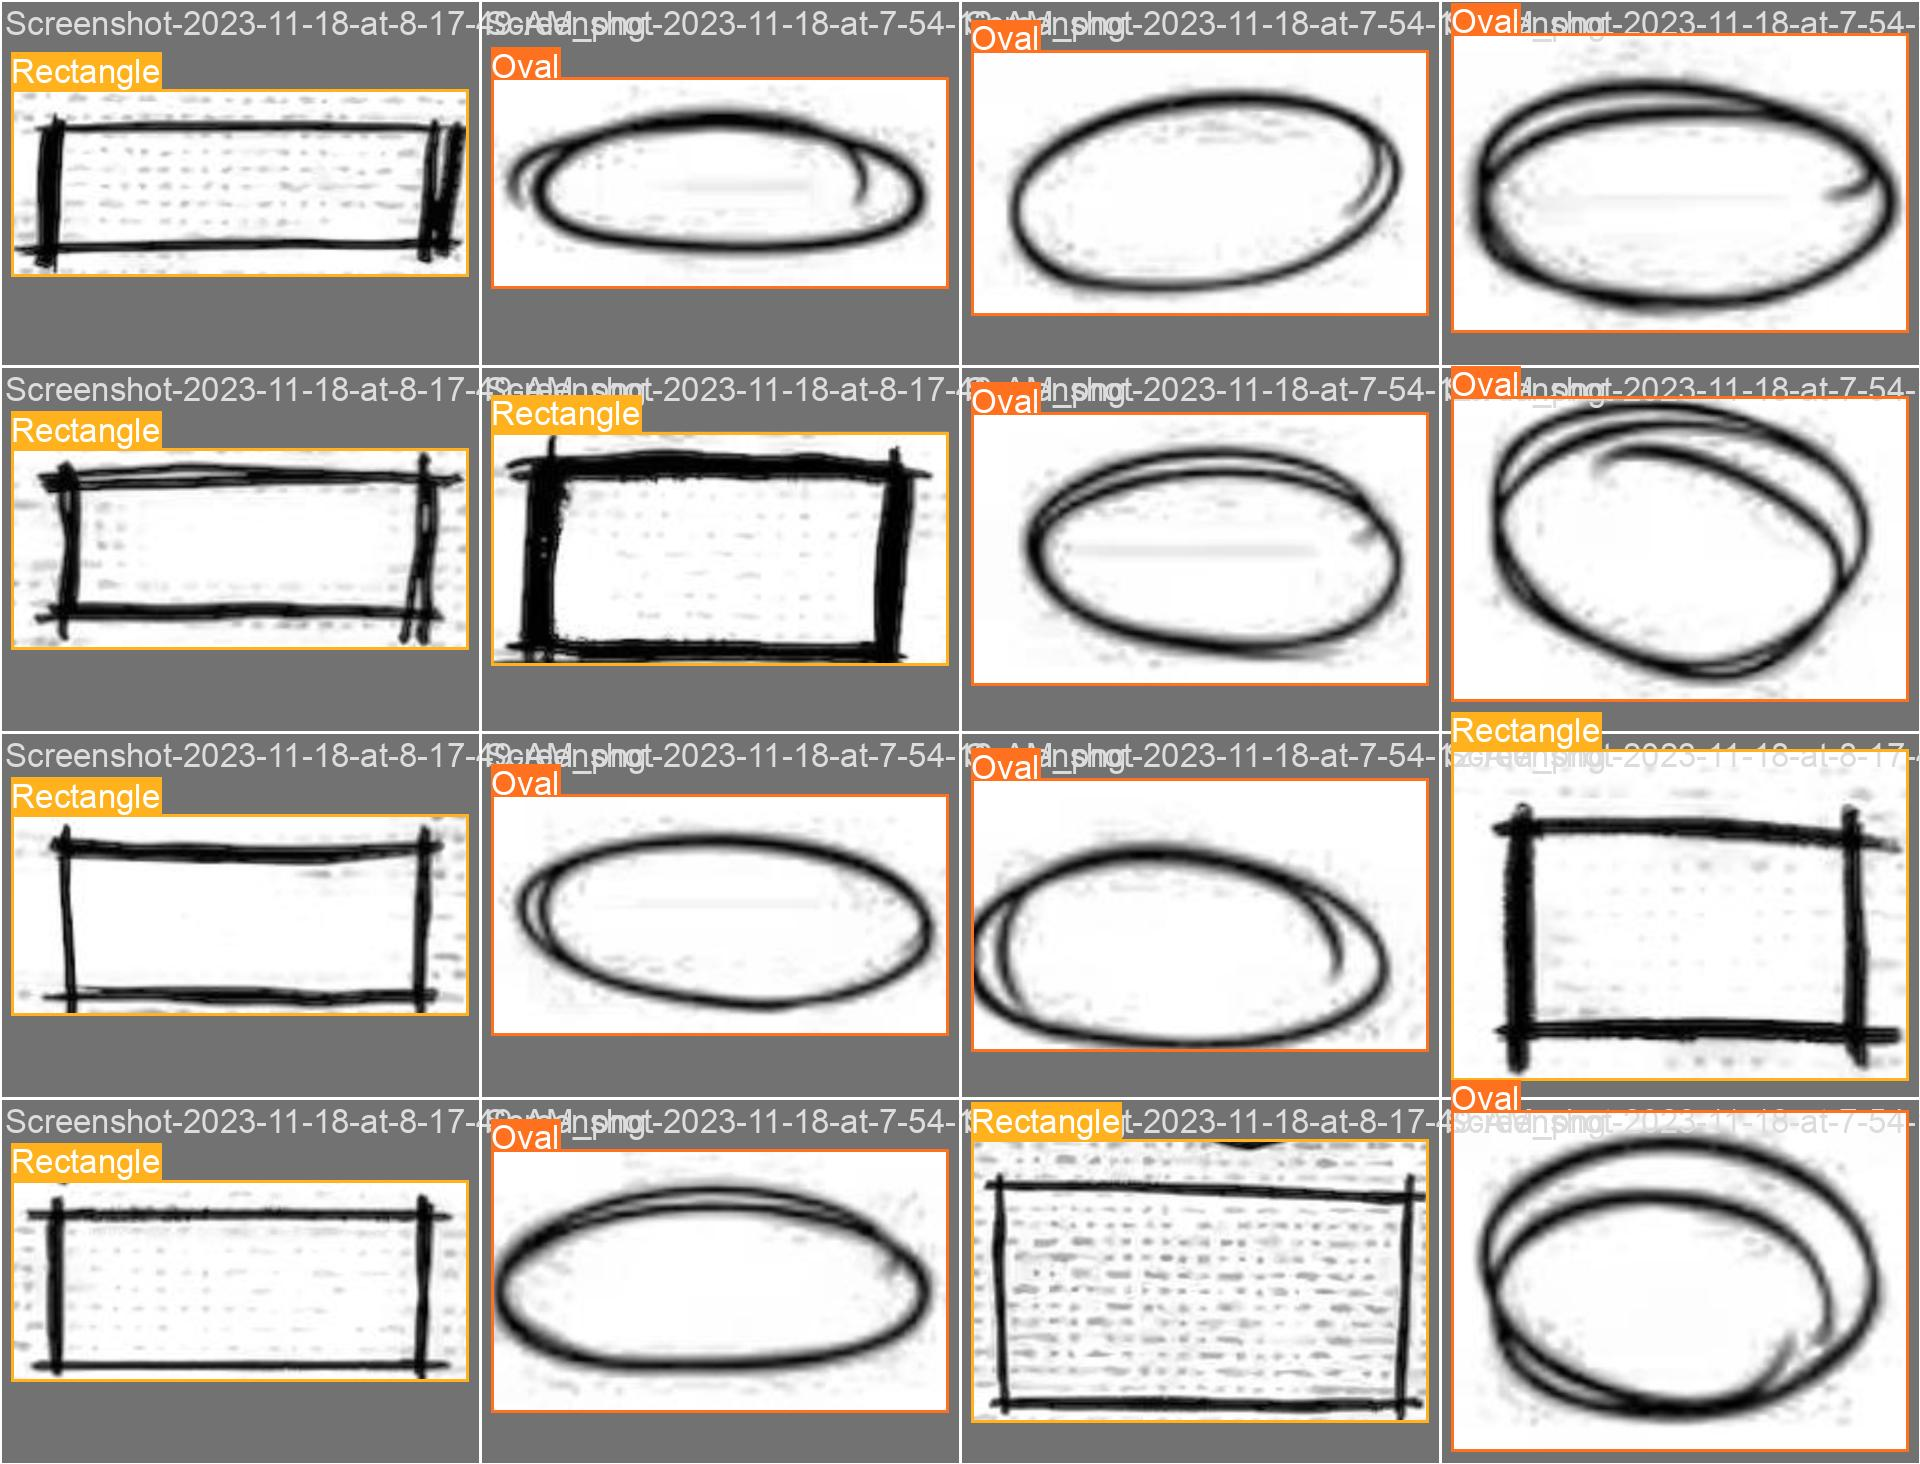

In [15]:
Image(filename=f'/content/runs/detect/val/val_batch0_labels.jpg', width=600)
# Labels

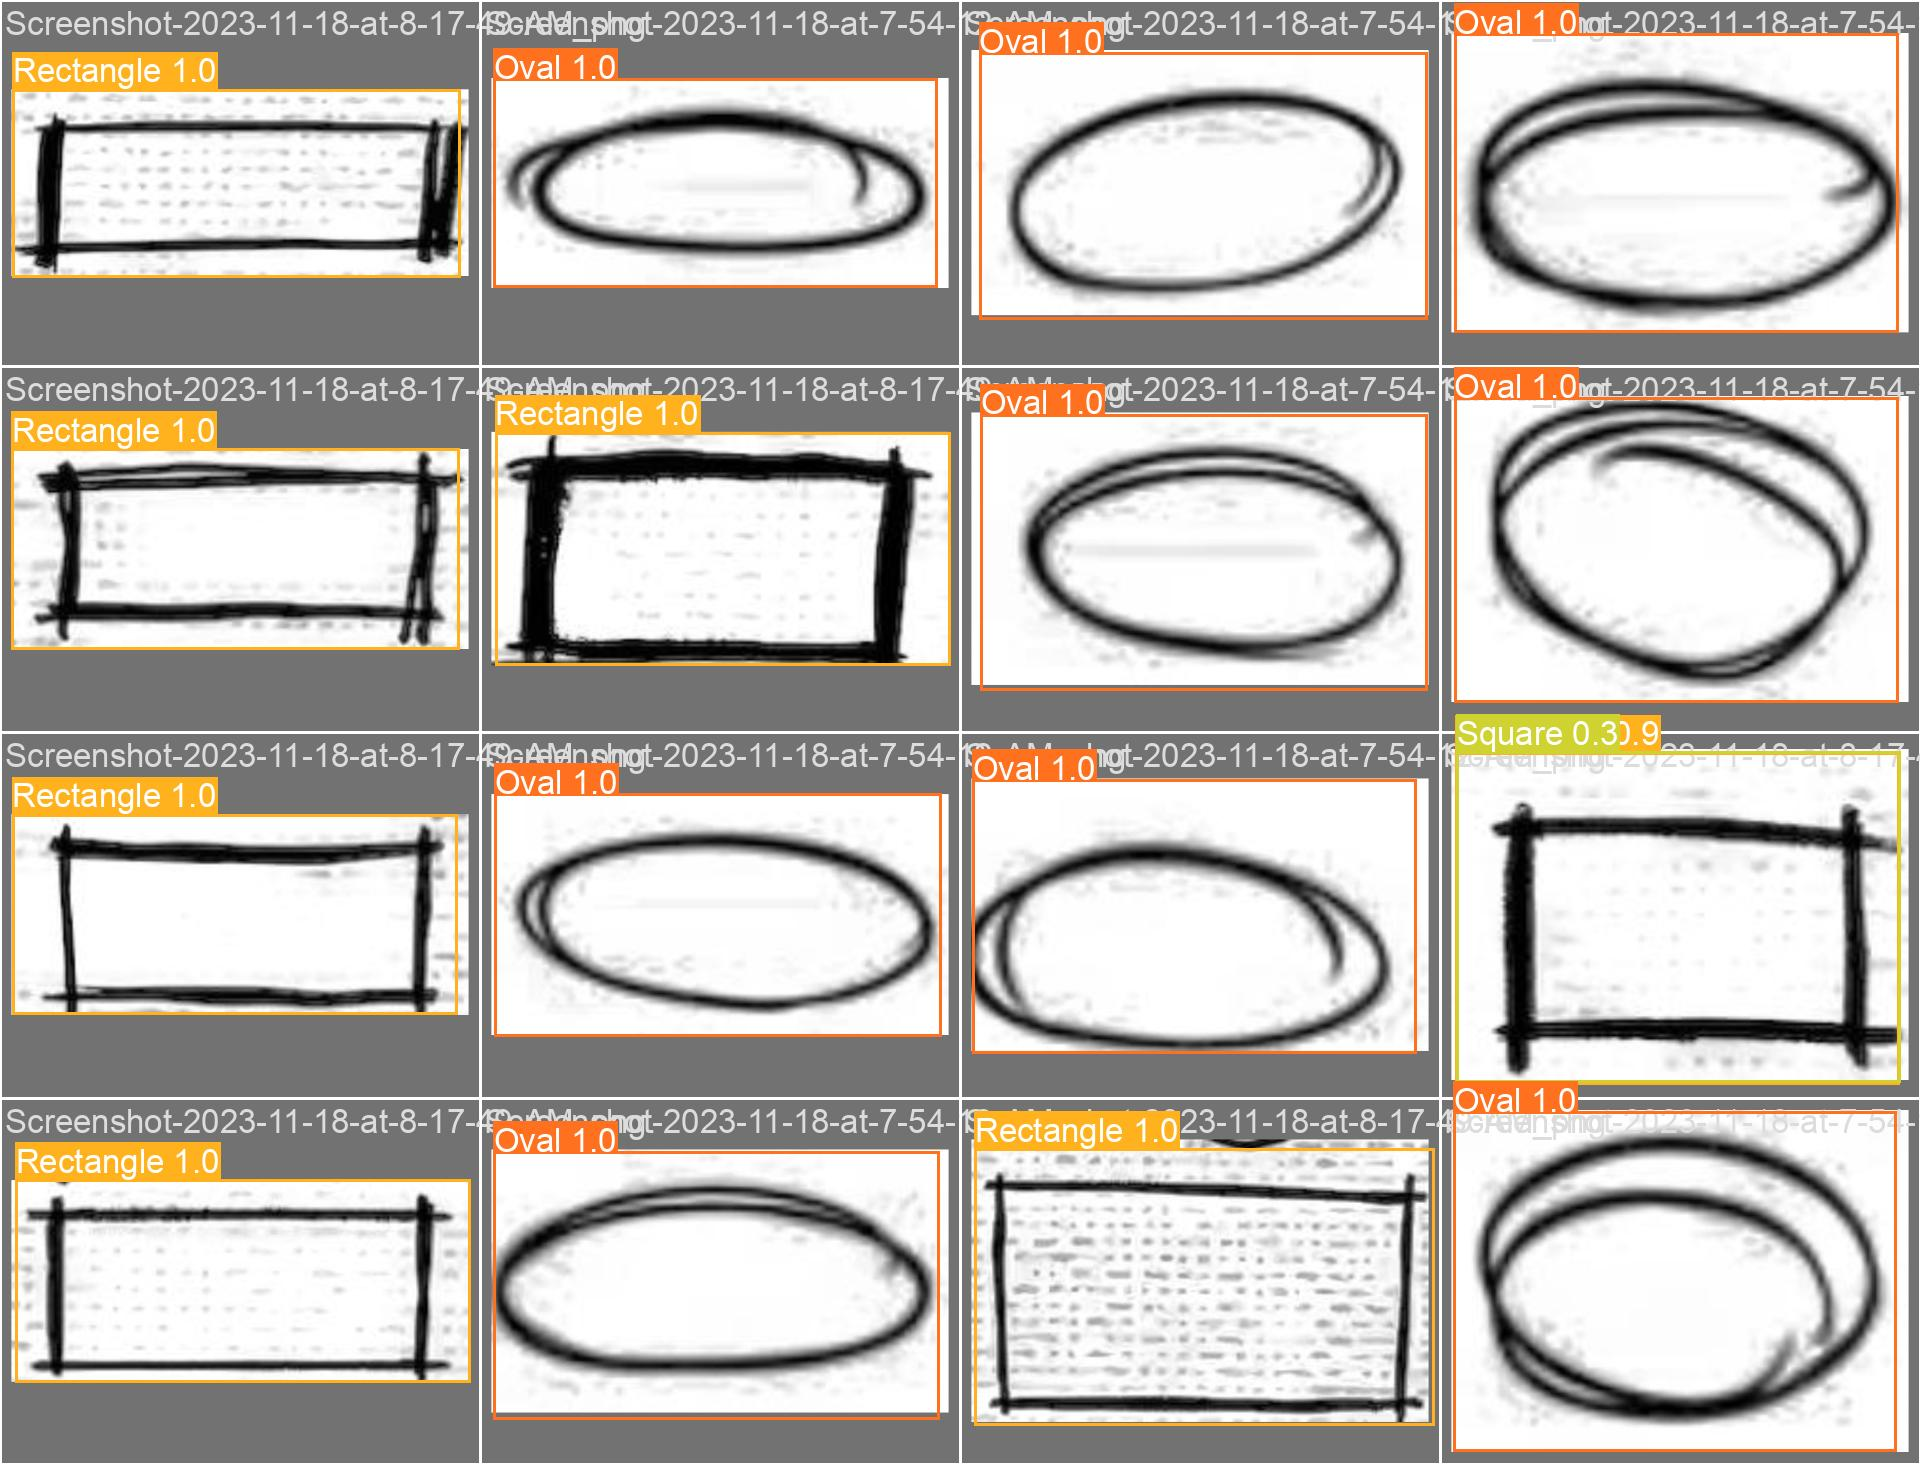

In [16]:
Image(filename=f'/content/runs/detect/val/val_batch0_pred.jpg', width=600)
# Predicted

In [18]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/Shapes-4/test/images/Screenshot-2023-11-18-at-7-55-57-AM_png.rf.759a5235cb06dc49d5efc071eb964781.jpg: 352x640 1 Circle, 100.9ms
image 2/11 /content/Shapes-4/test/images/Screenshot-2023-11-18-at-8-17-32-AM_png.rf.6c645750d3ae15754cab3bcc1e08ca6b.jpg: 640x608 2 Rectangles, 1 Square, 61.9ms
image 3/11 /content/Shapes-4/test/images/Screenshot-2023-11-18-at-8-17-32-AM_png.rf.757fba471973e5ff532d0aa9ed672d85.jpg: 640x608 3 Rectangles, 1 Square, 15.9ms
image 4/11 /content/Shapes-4/test/images/Screenshot-2023-11-18-at-8-17-32-AM_png.rf.9d2984ce878de6c7833d5eaf9f9ee681.jpg: 640x640 1 Square, 16.8ms
image 5/11 /content/Shapes-4/test/images/Screenshot-2023-11-18-at-8-17-32-AM_png.rf.c2663c3e746a0752e25524e8aa5157ae.jpg: 640x576 1 Rectangle, 1 Square, 60.2ms
image 6/11 /content/Shapes-4/test/images/Screenshot-2

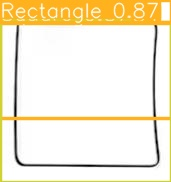

In [19]:
Image(filename=f'/content/runs/detect/predict/Screenshot-2023-11-18-at-8-17-32-AM_png.rf.6c645750d3ae15754cab3bcc1e08ca6b.jpg', width=600)

In [22]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/flowcharts

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Shapes-4/flowcharts/testflowchart.png: 640x640 3 Decisions, 2 Rectangles, 16.3ms
Speed: 5.5ms preprocess, 16.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


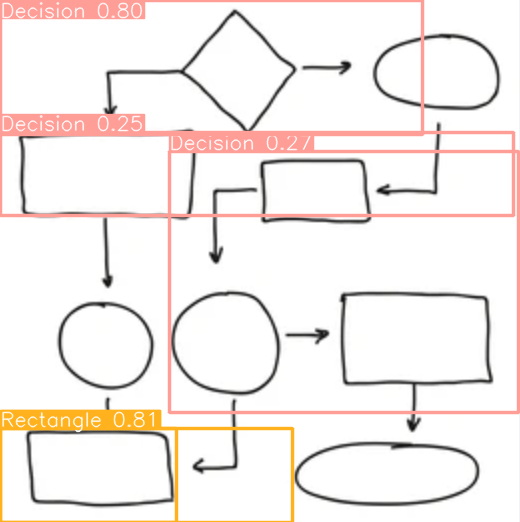

In [21]:
Image(filename=f'/content/runs/detect/predict2/testflowchart.png', width=600)